In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import sarracen as src
import numpy as np

/users/labnet/st2/jjnarvaezcor/virtual-env/lib/python3.8/site-packages/sarracen/kernels/cubic_spline.py:15: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit(fastmath=True)
/users/labnet/st2/jjnarvaezcor/virtual-env/lib/python3.8/site-packages/sarracen/kernels/quartic_spline.py:15: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit(fastmath=True)
/users/labnet/

# Initial Setup

In [27]:
sdf = src.read_csv('../Data/results/kelvin_helmholtz/35.csv')
sdf.params={'mass':0.00075}
sdf

,x,y,vx,vy,u,h,rho
0,0.817631,0.000673,-0.490728,-0.003747,3.750563,0.017307,1.001568
1,0.968141,0.751624,-0.029138,0.004682,3.830325,0.016041,1.165960
2,0.816830,0.013202,-0.516674,-0.002702,3.749766,0.017310,1.001223
3,0.910109,0.763864,-0.171599,0.003917,3.911141,0.016970,1.041733
4,0.817782,0.025738,-0.484518,-0.001536,3.748958,0.017313,1.000925
...,...,...,...,...,...,...,...
7195,0.167566,0.695331,0.480915,-0.004769,1.882835,0.012224,2.007833
7196,0.162091,0.705686,0.429164,-0.005965,1.876696,0.012277,1.990369
7197,0.147414,0.716362,0.361689,-0.001446,1.873104,0.012358,1.964492
7198,0.119917,0.727905,0.261948,-0.002048,1.839258,0.012724,1.852971


<Axes: xlabel='x', ylabel='y'>

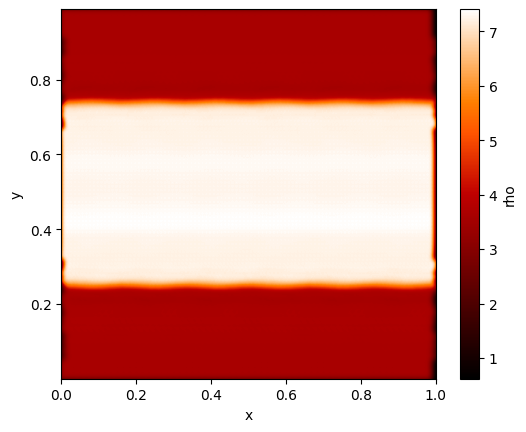

In [28]:
sdf.render('rho', xsec=1.0)

# Final Setup

In [18]:
sdft = src.read_csv('../Data/results/kelvin_helmholtz/final.csv')
sdft

FileNotFoundError: [Errno 2] No such file or directory: '../Data/results/kelvin_helmholtz/final.csv'

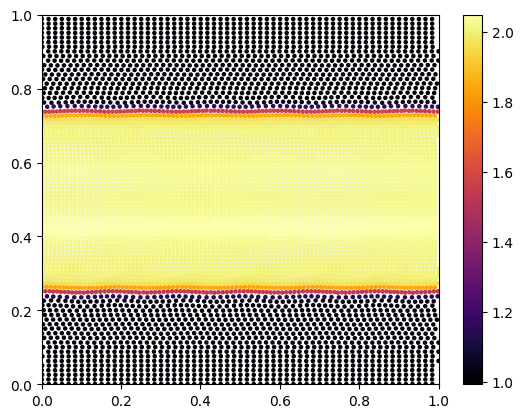

In [30]:
plt.scatter(sdf['x'], sdf['y'], c=sdf['rho'], cmap='inferno', s=5)
plt.colorbar()
plt.xlim(0., 1.)
plt.ylim(0., 1.)
plt.show()

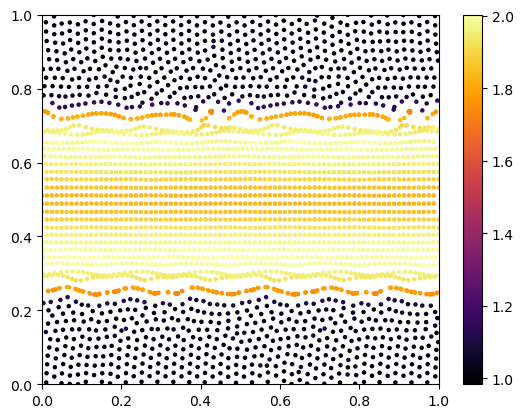

In [5]:
plt.scatter(sdft['x'], sdft['y'], c=sdft['rho'], cmap='inferno', s=5)
plt.colorbar()
plt.xlim(0., 1.)
plt.ylim(0., 1.)
plt.show()

# Angular Momentum's Conservation

In [6]:
# Angular Momentum
def angular_momentum(x, y, vx, vy):
    return x*vy - y*vx

In [7]:
T = 500
time = range(0, T)
ang_mom = np.zeros(T)

for ii in range(1, T+1):
    df = src.read_csv('../Data/results/kelvin_helmholtz/' + str(ii) + ".csv")
    df.params={'mass': 2.0/df.shape[0]}
    ang_mom[ii-1] = np.sum(angular_momentum(df['x'], df['y'], df['vx'], df['vy']))

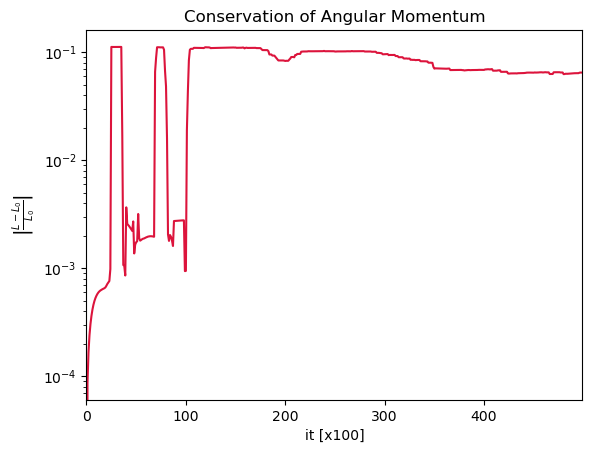

In [9]:
plt.plot(time[:], np.abs((ang_mom[:]-ang_mom[0])/ang_mom[0]), '-', color='crimson')
plt.title("Conservation of Angular Momentum")
plt.xlabel("it [x100]")
plt.ylabel(r"$\left|\frac{L-L_0}{L_0}\right|$")
plt.xlim(0, T-1)
plt.yscale("log")
plt.show()

# Conservation of Energy

In [10]:
# Energy
def energy(vx, vy, u):
    return 0.5*(vx*vx + vy*vy)+u

In [11]:
energ = np.zeros(T)

for ii in range(1, T+1):
    df = src.read_csv('../Data/results/kelvin_helmholtz/' + str(ii) + ".csv")
    energ[ii-1] = np.sum(energy(df['vx'], df['vy'], df['u']))

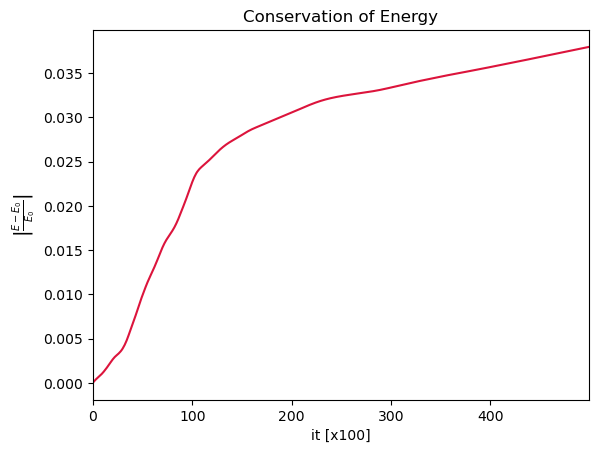

In [12]:
plt.plot(time[:], np.abs((energ[:]-energ[0])/energ[0]), '-', color='crimson')
plt.title("Conservation of Energy")
plt.xlabel("it [x100]")
plt.ylabel(r"$\left|\frac{E-E_0}{E_0}\right|$")
plt.xlim(0, T-1)
plt.show()